In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd

누락값(결측치) 처리

분석하려는 데이터에 누락값이 없으면 좋겠지만 누락값은 대부분의 데이터에 존재하고 깔끔한 데이터를 위해 누락값을 처리하는 것은 매우 중요하다.  
누락값은 pandas에서는 NaN으로 표기되고 누락값 자체를 사용해보려면 numpy 라이브러리가 필요하다.

In [2]:
# 누락값을 사용하기 위해 numpy에서 누락값을 import 한다.
from numpy import NaN, NAN, nan

In [6]:
# 누락값은 0, ''과 같은 값과는 다른 개념으로 데이터 자체가 없다는 것을 의미한다. => null, None
print(NaN == True)
print(NaN == False)
print(NaN == 0)
print(NaN == '')

False
False
False
False


In [9]:
# 누락값은 값 자체가 없기 때문에 자기 자신과 비교해도 False가 출력된다.
print(NaN == NaN)
print(NAN == NAN)
print(nan == nan)

False
False
False


In [12]:
# 누락값 여부를 확인하는 메소드는 isnull(), isna() 메소드가 있고 누락값은 True, 누락값이 아니면 False를 리턴한다.
print(pd.isnull(NaN))
print(pd.isnull(NAN))
print(pd.isnull(nan))
print(pd.isnull(0))
print(pd.isnull(''))

True
True
True
False
False


In [13]:
print(pd.isna(NaN))
print(pd.isna(NAN))
print(pd.isna(nan))
print(pd.isna(0))
print(pd.isna(''))

True
True
True
False
False


In [15]:
# isnull(), isna() 메소드와 반대로 누락값은 False, 누락값이 아니면 True를 리턴하는 notnull(), notna() 메소드도 있다.
print(pd.notnull(NaN))
print(pd.notnull(NAN))
print(pd.notnull(nan))
print(pd.notnull(0))
print(pd.notnull(''))

False
False
False
True
True


In [16]:
print(pd.notna(NaN))
print(pd.notna(NAN))
print(pd.notna(nan))
print(pd.notna(0))
print(pd.notna(''))

False
False
False
True
True


누락값 확인하기

In [17]:
# Cases_* => 국가별 발병자 수, Deaths_* => 국가별 사망자 수
ebola = pd.read_csv('./data/country_timeseries.csv')
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# numpy의 count_nonzero() 메소드는 0 또는 False가 아닌 데이터의 개수를 센다. => 문자가 입력되면 오동작한다.
print(np.count_nonzero([False, 0, True, 1, 100]))
print(np.count_nonzero(ebola.isnull())) # ebola 데이터프레임의 전체 누락값 개수
print(np.count_nonzero(ebola['Cases_Guinea'].isnull())) # ebola 데이터프레임의 Cases_Guinea 열의 누락값 개수
print(np.count_nonzero(ebola.get('Cases_Liberia').isnull())) # ebola 데이터프레임의 Cases_Liberia 열의 누락값 개수
print(np.count_nonzero(ebola.Cases_SierraLeone.isnull())) # ebola 데이터프레임의 Cases_SierraLeone 열의 누락값 개수

3
1214
29
39
35


In [34]:
# count() 메소드는 열 인덱스 별 누락값이 아닌 데이터의 개수를 센다.
print(ebola.shape)
print(ebola.shape[0])
# 전체 데이터의 개수에서 누락값이 아닌 데이터의 개수를 빼면 누락값의 개수가 된다.
print(ebola.shape[0] - ebola.count())

(122, 18)
122
Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64


In [37]:
# value_counts() 메소드로 시리즈에 저장된 데이터의 빈도수를 얻어올 수 있다.
print(type(ebola.Cases_Guinea))
print(ebola.Cases_Guinea.value_counts())

<class 'pandas.core.series.Series'>
86.0      3
495.0     2
112.0     2
390.0     2
408.0     1
         ..
1199.0    1
1298.0    1
1350.0    1
1472.0    1
49.0      1
Name: Cases_Guinea, Length: 88, dtype: int64


In [39]:
# value_counts() 메소드는 dropna 옵션의 기본값이 True로 설정되어 있어서 기본적으로 누락값을 무시하고 데이터의
# 빈도수를 얻어온다.
# 누락값을 포함한 데이터의 빈도수를 얻어오려면 dropna=False로 지정하면 된다.
print(ebola.Cases_Guinea.value_counts(dropna=False))

NaN       29
86.0       3
495.0      2
112.0      2
390.0      2
          ..
1199.0     1
1298.0     1
1350.0     1
1472.0     1
49.0       1
Name: Cases_Guinea, Length: 89, dtype: int64


missingno 라이브러리로 누락값의 분포를 확인하기

In [43]:
import missingno as msno
import matplotlib.pyplot as plt

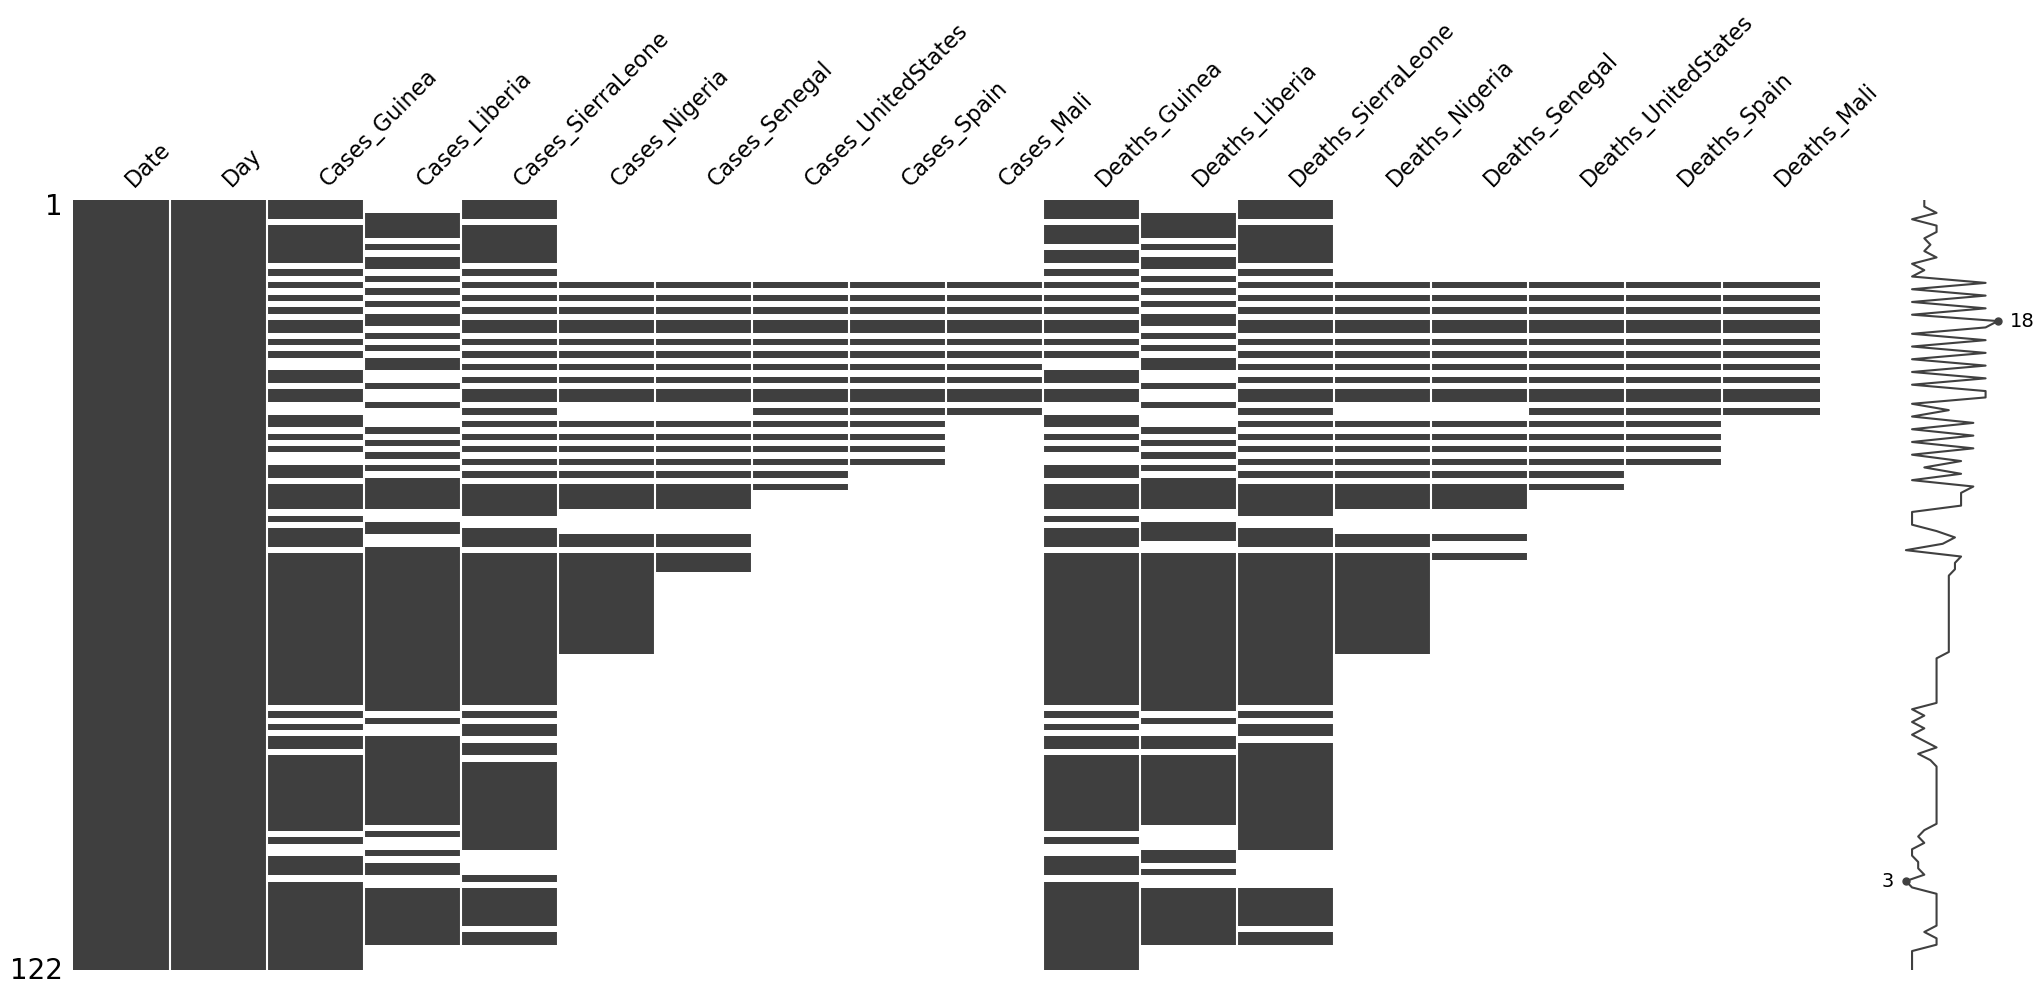

In [44]:
# missingno 라이브러리의 matrix() 메소드를 사용하면 누락값의 분포를 확인할 수 있다.
msno.matrix(ebola)
plt.show()

누락값 처리하기

In [45]:
ebola.iloc[:10, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,NaN,8157.0,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,NaN,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,NaN,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [47]:
# dropna() 메소드로 누락값이 1개 이상 포함된 데이터를 제거할 수 있다.
ebola.iloc[:10, :5].dropna()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
2,1/3/2015,287,2769.0,8166.0,9722.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
7,12/24/2014,277,2630.0,7977.0,9203.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [48]:
# fillna() 메소드의 인수로 특정 값을 지정하면 누락값을 특정 값으로 변경한다.
ebola.iloc[:10, :5].fillna(0)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,0.0,10030.0
1,1/4/2015,288,2775.0,0.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,0.0,8157.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,0.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,0.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [49]:
# fillna() 메소드의 method='ffill' 옵션을 지정하면 누락값을 누락값 바로 전 값으로 변경한다.
ebola.iloc[:10, :5].fillna(method='ffill')

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2769.0,8157.0,9722.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,8018.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7977.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [50]:
# fillna() 메소드의 method='bfill' 옵션을 지정하면 누락값을 누락값 바로 다음 값으로 변경한다.
ebola.iloc[:10, :5].fillna(method='bfill')

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,8166.0,10030.0
1,1/4/2015,288,2775.0,8166.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2730.0,8157.0,9633.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,7977.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7862.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [51]:
# interpolate() 메소드는 누락값을 누락값 양쪽 데이터의 평균으로 변경한다.
ebola.iloc[:10, :5].interpolate()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2749.5,8157.0,9677.5
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,7997.5,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7919.5,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


누락값이 하나라도 있으면 연산자를 사용한 계산 결과도 누락값이 된다.

In [56]:
subset = ebola.loc[:5, ['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone']]
subset

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2776.0,NaN,10030.0
1,2775.0,NaN,9780.0
2,2769.0,8166.0,9722.0
3,NaN,8157.0,NaN
4,2730.0,8115.0,9633.0
5,2706.0,8018.0,9446.0


In [57]:
subset['Cases_Total'] = subset.Cases_Guinea + subset.Cases_Liberia + subset.Cases_SierraLeone
subset

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Total
0,2776.0,NaN,10030.0,NaN
1,2775.0,NaN,9780.0,NaN
2,2769.0,8166.0,9722.0,20657.0
3,NaN,8157.0,NaN,NaN
4,2730.0,8115.0,9633.0,20478.0
5,2706.0,8018.0,9446.0,20170.0


기초 통계를 계산하는 메소드들은 skipna 옵션이 True가 기본값으로 설정되어 있어서 누락값을 무시하고 메소드가 실행된다.

In [68]:
print(subset.Cases_Guinea.sum()) # subset.Cases_Guinea.sum(skipna=True)
# skipna 옵션을 False로 지정하면 누락값을 포함한 연산을 실행해서 메소드 실행 결과가 누락값이 된다.
print(subset.Cases_Guinea.sum(skipna=False))
print(subset.Cases_Guinea.mean())
print(subset.Cases_Guinea.max())
print(subset.Cases_Guinea.min())
print(subset.Cases_Guinea.var())
print(subset.Cases_Guinea.std())
print(subset.Cases_Guinea.count())
# count() 메소드는 skipna 옵션이 제공되지 않는다. 누락값을 무조건 무시한다.
# print(subset.Cases_Guinea.count(skipna=False)) # 에러

13756.0
nan
2751.2
2776.0
2706.0
997.7
31.586389473949062
5
